#Análisis del Problema

El conjunto de datos contiene información sobre datos históricos de ventas de 1,115 tiendas Rossmann. Se pretende predecir las ventas de con respecto al conjunto de características que posee.

## Descarga de los archivos de datos:
https://drive.google.com/file/d/1nVPLto5xnVHh_Gx2v4rNk5ZzjvBCPnHC/view?usp=sharing

### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **Id**:un identificador que representa un par (Tienda, Fecha) en el conjunto de prueba.
* **Store**:un identificador único para cada tienda.
* **Sales**:la facturación para un día determinado (esto es lo que está prediciendo).
* **Customers**:el número de clientes en un día determinado.
* **Open**:un indicador de si la tienda estaba abierta: 0 = cerrada, 1 = abierta.
* **StateHoliday**: indica un día festivo estatal. Normalmente, todas las tiendas, con pocas excepciones, están cerradas en días festivos estatales. Tenga en cuenta que todas las escuelas están cerradas en días festivos públicos y fines de semana. a = día festivo público, b = día festivo de Pascua, c = Navidad, 0 = Ninguno.
* **SchoolHoliday**:indica si (Tienda, Fecha) se vio afectada por el cierre de escuelas públicas.
* **StoreType**: diferencia entre 4 modelos diferentes de tiendas: a, b, c, d.
* **Assortment**: describe un nivel de surtido: a = básico, b = extra, c = extendido.
* **CompetitionDistance**:distancia en metros a la tienda competidora más cercana.
* **Promo**:indica si una tienda está haciendo una promoción ese día.
* **Promo2**:Promo2 es una promoción continua y consecutiva para algunas tiendas: 0 = la tienda no participa, 1 = la tienda participa.
* **PromoInterval**:describe los intervalos consecutivos en los que se inicia Promo2, nombrando los meses en que comienza la promoción de nuevo.

#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/trainRossmann.csv")

<ipython-input-34-7b4ec51a9bab>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sample_data/trainRossmann.csv")


##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


El set de datos contiene números sumamente grandes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Mostrar los valores únicos que tiene el atributo StateHoliday
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado una lista vacia, lo que significa que en este dataset no existen nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

Tampoco existen valores infinitos. Ya que de manera similar al caso anterior con los nulos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

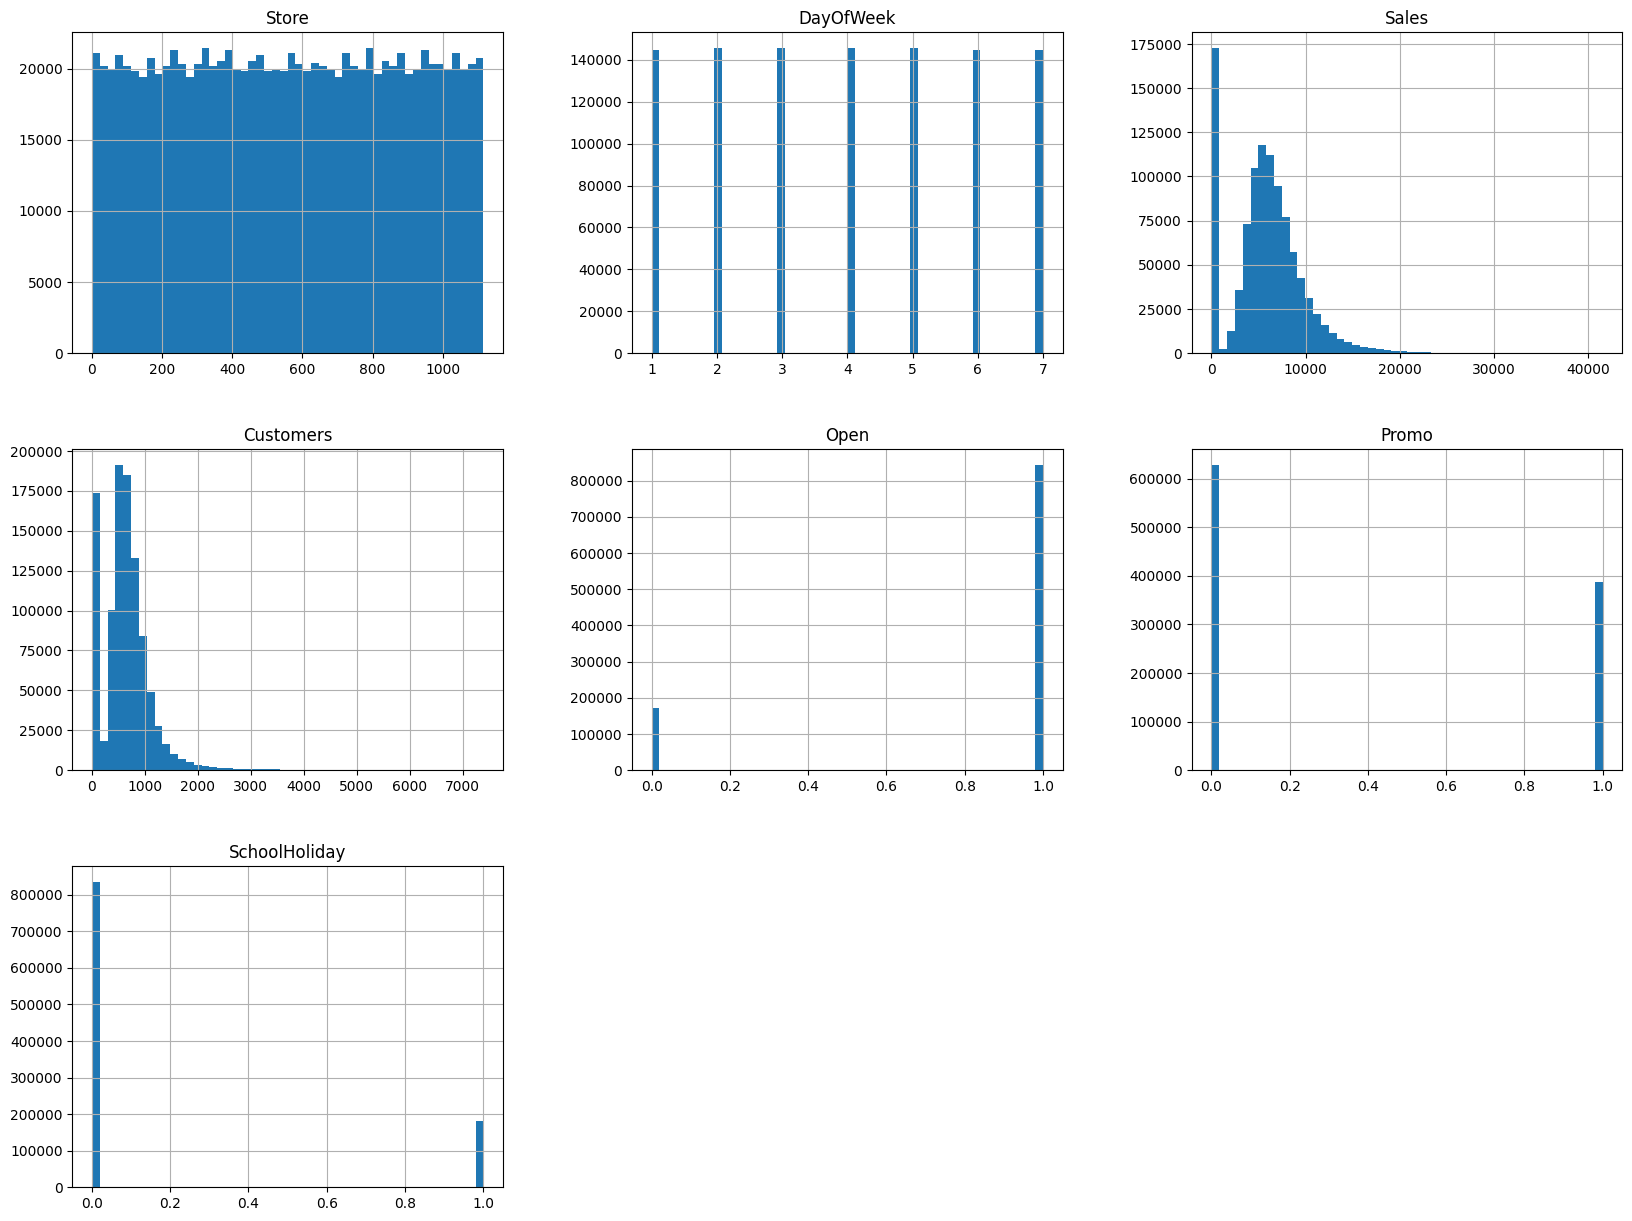

In [ ]:
# Representamos gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Transformamos la columna StateHoliday a string. Esto debido a que la columna tiene una combinación de datos numéricos y categóricos.

#copiamos el conjunto de datos para no alterar el original
df_copy = df.copy()

df_copy['StateHoliday'] = df['StateHoliday'].astype(str)


In [ ]:
# Transformamos los valores del atributo StateHoliday de categoricos a numericos
labelencoder = LabelEncoder()
df_copy["StateHoliday"] = labelencoder.fit_transform(df_copy["StateHoliday"])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  int64 
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 69.8+ MB


In [ ]:
#Mostramos correlación lineal entre todos los atributos del conjunto de datos
df_copy.corr()

<ipython-input-44-3c2d6dd7365a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000362,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.044265,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,-0.229029,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,-0.204295,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,-0.340893,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,-0.024157,0.067483
StateHoliday,0.000362,-0.044265,-0.229029,-0.204295,-0.340893,-0.024157,1.000000,0.196424
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,0.196424,1.000000


En la siguiente instrucción podemos ver que hay una fuerte correlación entre Selling_Price que es la variable de salida con Present_Price:

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_copy.corr()
corr_matrix["Sales"].sort_values(ascending=False)

<ipython-input-45-4981271d4105>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


Sales            1.000000
Customers        0.894711
Open             0.678472
Promo            0.452345
SchoolHoliday    0.085124
Store            0.005126
StateHoliday    -0.229029
DayOfWeek       -0.462125
Name: Sales, dtype: float64

<ipython-input-46-0291b5bb1a5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


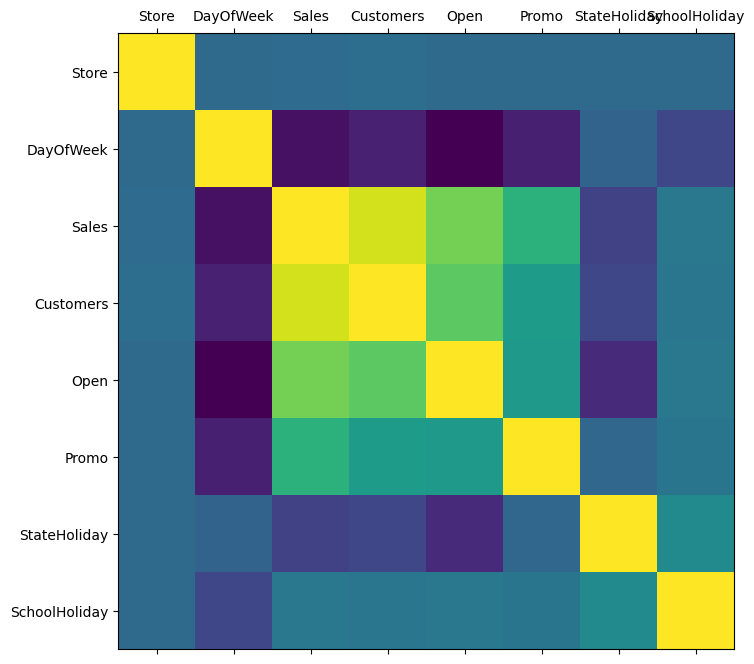

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

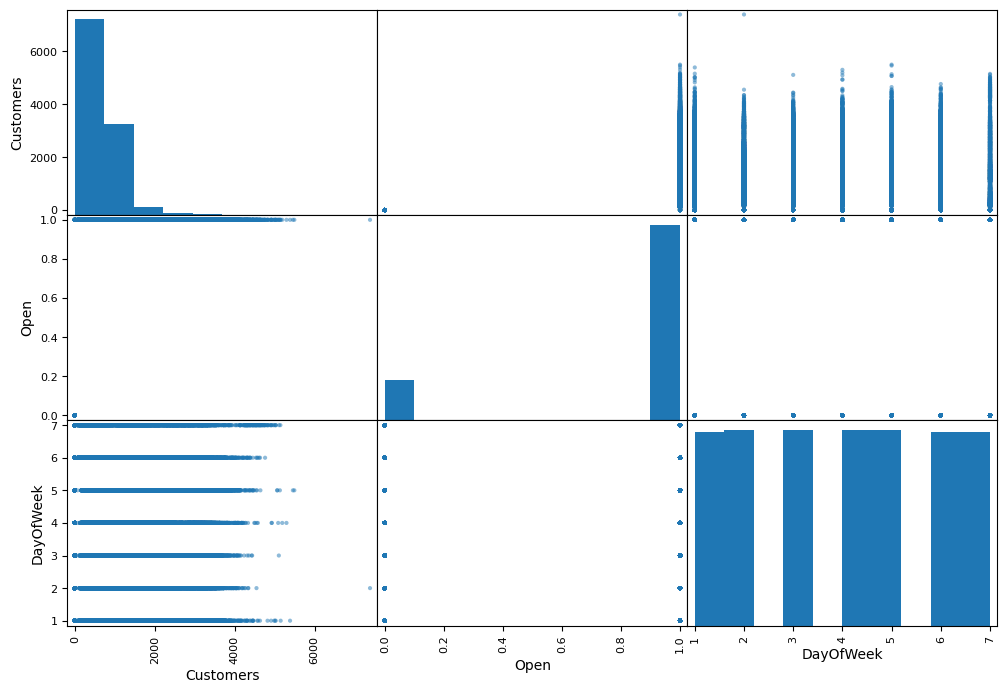

In [ ]:
# Correlaciones representadas gráficamente
atributos = ["Customers", "Open", "DayOfWeek"]

scatter_matrix(df_copy[atributos], figsize=(12, 8))
plt.show()

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 70/30 ya que son bastantes datos
train_set, test_set = train_test_split(df_copy, test_size=0.3, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712046 entries, 817013 to 121958
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          712046 non-null  int64 
 1   DayOfWeek      712046 non-null  int64 
 2   Date           712046 non-null  object
 3   Sales          712046 non-null  int64 
 4   Customers      712046 non-null  int64 
 5   Open           712046 non-null  int64 
 6   Promo          712046 non-null  int64 
 7   StateHoliday   712046 non-null  int64 
 8   SchoolHoliday  712046 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 54.3+ MB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305163 entries, 76435 to 226299
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Date           305163 non-null  object
 3   Sales          305163 non-null  int64 
 4   Customers      305163 non-null  int64 
 5   Open           305163 non-null  int64 
 6   Promo          305163 non-null  int64 
 7   StateHoliday   305163 non-null  int64 
 8   SchoolHoliday  305163 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 23.3+ MB


In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("Sales", axis=1)
y_train = train_set["Sales"].copy()

X_test = test_set.drop("Sales", axis=1)
y_test = test_set["Sales"].copy()

##4. Preparación del conjunto de datos

In [ ]:
# Comprobación de si existen valores nulos
is_null = X_train.isna().any()
is_null[is_null]

Series([], dtype: bool)

#Modelo Regresión Lineal Simple

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(X_train['Customers'].values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_reg.predict(X_test['Customers'].values.reshape(-1, 1))
y_pred

array([1074.09485289, 6346.11213478, 9613.27777425, ..., 4564.02178597,
       1074.09485289, 7586.15000249])

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 2980821.76


In [ ]:
# El mejor puntaje es el que esta cercano a 1
print('Variance Score: %.2f' % r2_score(y_test, y_pred))

Variance Score: 0.80


In [ ]:
lin_reg.score(X_test['Customers'].values.reshape(-1, 1), y_test)

0.7999841588829462

#Evaluación

In [ ]:
# Parámetro theta 0
lin_reg.intercept_

1074.094852894501

In [ ]:
# Parámetro theta 1
lin_reg.coef_

array([7.42537645])

In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[X_train["Customers"].min()], [X_train["Customers"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

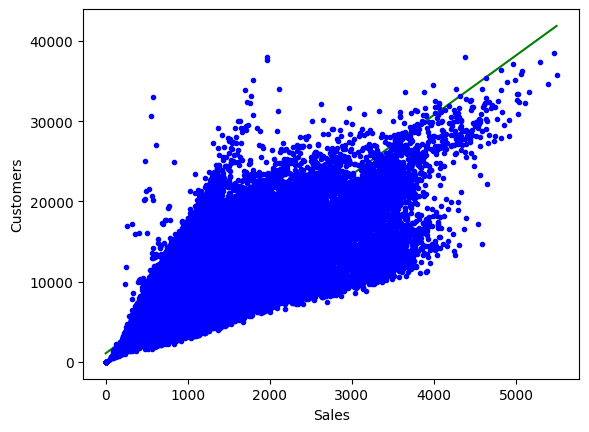

In [ ]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(X_train['Customers'], y_train, "b.")
plt.xlabel("Sales")
plt.ylabel("Customers")
plt.show()

#Modelo Regresión Lineal Múltiple


In [ ]:
#Escogeremos las categorias de entrada
X_train_mult = X_train[['Customers','Open','Promo']]
X_test_mult = X_test[['Customers','Open', 'Promo']]

# las transformamos en arreglo de 2 dimensiones
X_train_mult2D = X_train_mult.values
X_test_mult2D = X_test_mult.values

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_regMult = LinearRegression()
lin_regMult.fit(X_train_mult2D, y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_regMult.predict(X_test_mult2D)
y_pred

array([ -86.39007464, 7378.54522103, 8711.68321979, ..., 4578.99466699,
        -86.39007464, 7052.5303155 ])

In [ ]:
lin_regMult.score(X_test_mult2D, y_test)

0.8509745904246334

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(lin_regMult, "10VentasRossmann.pkl")

['10VentasRossmann.pkl']

In [ ]:
# Cargar modelo
#regLinealCargado = joblib.load("10VentasRossmann.pkl")

#Conclusión
El presente conjunto de datos utilizando la regresión lineal simple con la característica Customers, presenta una varianza del 80%, lo cuál dependiendo de qué tan rigurosos sean puede ser aceptable. Aplicando regresión lineal múltiple con las características de Customers, Open y Promo, el modelo se comporta de mejor manera ya que el score sube 5% más quedando una presición del modelo en un 85%.  